In [1]:
import nltk
import sklearn
from platform import python_version

# Import Libraries
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from IPython.display import display_html 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold

from pandas import DataFrame

%matplotlib inline  

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                     for a in self.args)

    def __repr__(self):
       return '\n\n'.join(a + '\n' + repr(eval(a))
                       for a in self.args)

newline='\n'

Index(['instant', 'dteday', 'yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1'],
      dtype='object')


,instant,dteday,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,...,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1,workingday_0,workingday_1
0,-1.729683,-1.674108,-1.001369,-1.600161,1.498809,-0.826662,-0.679946,1.250171,-0.387892,-0.753734,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
1,-1.724944,-1.560522,-1.001369,-1.600161,-1.496077,-0.721095,-0.740652,0.479113,0.749602,-1.045214,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
2,-1.720205,-1.446936,-1.001369,-1.600161,-0.996930,-1.634657,-1.749767,-1.339274,0.746632,-1.061246,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
3,-1.715466,-1.333351,-1.001369,-1.600161,-0.497782,-1.614780,-1.610270,-0.263182,-0.389829,-1.078734,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
4,-1.710728,-1.219765,-1.001369,-1.600161,0.001366,-1.467414,-1.504971,-1.341494,-0.046307,-1.116627,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.710728,1.279122,0.998633,1.588660,0.500513,-1.318665,-1.521108,0.175807,2.061426,-0.876156,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,-0.679706,0.679706
727,1.715466,1.392707,0.998633,1.588660,0.999661,-1.323224,-1.346690,-0.266238,-0.452131,-0.297567,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,-0.679706,0.679706
728,1.720205,1.506293,0.998633,1.588660,1.498809,-1.323224,-1.424344,0.878392,-0.853552,-1.004407,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
729,1.724944,1.619879,0.998633,1.588660,-1.496077,-1.309558,-1.490049,-1.015664,2.069444,-0.705640,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,1.471225,-1.471225


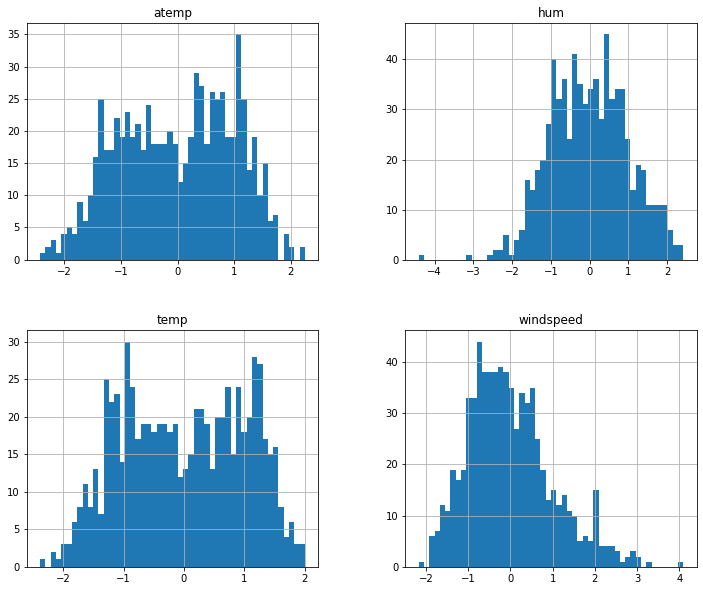

In [2]:
#################################################
#################################################
## This Notebook uses RYAN's encoding/Scaling  ##
#################################################
#################################################

########################### Bike Dataset ##########################
from sklearn.preprocessing import OneHotEncoder 

bike_data = pd.read_csv('../input/project4set2/day.csv')
bike_data_df = pd.DataFrame(data=bike_data)

#### OHE ####
#one hot encode weathersit for sure, season probably, weekday (0-6) maybe
# label encode the date into days of the month
encoded_bike_data = bike_data_df.copy()

encoded_bike_data['dteday'] = pd.to_datetime(bike_data_df['dteday']).dt.strftime('%d')
encoded_bike_data['dteday'] = pd.to_numeric(encoded_bike_data['dteday'])

# use pd.concat to join the new columns with your original dataframe
df_season = pd.concat([encoded_bike_data,pd.get_dummies(encoded_bike_data['season'], prefix='season')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df_season.drop(['season'],axis=1, inplace=True)

df_weathersit = pd.concat([df_season, pd.get_dummies(df_season['weathersit'], prefix = 'weathersit')], axis=1)
df_weathersit.drop(['weathersit'], axis=1, inplace=True)

df_holiday = pd.concat([df_weathersit, pd.get_dummies(df_weathersit['holiday'], prefix = 'holiday')], axis=1)
df_holiday.drop(['holiday'], axis=1, inplace=True)

df_workday = pd.concat([df_holiday, pd.get_dummies(df_holiday['workingday'], prefix = 'workingday')], axis=1)
df_workday.drop(['workingday'], axis=1, inplace=True)
bike_data_proc_df = df_workday
print(bike_data_proc_df.columns)

#### Save a non-Scaled Copy ####
encodedBikeDataset=bike_data_proc_df.copy(deep=True)
unscaledEncodedBikeDataset = encodedBikeDataset.copy(deep=True)

#### Scaling ####
from sklearn.preprocessing import StandardScaler

#standardize all feature columns
#remove registered and casual?

col_names = bike_data_proc_df.columns
features = bike_data_proc_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#assign scaled results to the dataset copy
bike_data_proc_df[col_names] = features
#print(bike_data_proc_df)

############# Incorporate back into Jake's Notebook ##########
encodedBikeDataset=bike_data_proc_df.copy(deep=True)

bike_data_proc_df.hist(column=['temp', 'atemp','hum', 'windspeed'], figsize = (12,10), bins=50)

bikeFeatureList = list(encodedBikeDataset.columns)
bikeFeatureList.remove('cnt')
bikeFeatureList.remove('registered')
bikeFeatureList.remove('casual')

###### Used by the rest of the Notebook ######
encodedBikeDataset

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.111427,-0.582615,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
1,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.084167,-0.559768,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
2,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.042455,-0.545116,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
3,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-1.990233,-0.515564,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
4,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-1.741727,-0.406049,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,2.387620,-0.312921,-0.218492,-0.378671,0.797072,5.416577,3.628857,-0.098879,3.656298,1.037117,...,-1.432130,-0.524256,-0.332299,1.086510,-0.459982,-0.604022,1.736157,-0.574776,-0.579477,-0.579163
68780,-0.544926,0.032528,0.280232,-0.049625,0.958016,-0.765280,-0.440548,-0.098879,-0.447030,-0.453909,...,-1.238843,0.531476,-0.332299,-0.920378,-0.459982,1.655568,-0.575985,-0.574776,1.725695,-0.579163
68781,-0.127879,-0.658369,-0.717217,-0.305176,0.252873,0.331882,-0.068911,-0.098879,-0.064958,-0.249780,...,-1.431966,-0.573923,-0.332299,-0.920378,-0.459982,1.655568,1.736157,-0.574776,-0.579477,-0.579163
68782,-0.357837,1.414323,1.277682,1.965863,0.797072,-0.033839,-0.185438,-0.098879,-0.185057,0.556589,...,-1.431802,-0.282627,-0.332299,1.086510,-0.459982,-0.604022,-0.575985,-0.574776,1.725695,-0.579163


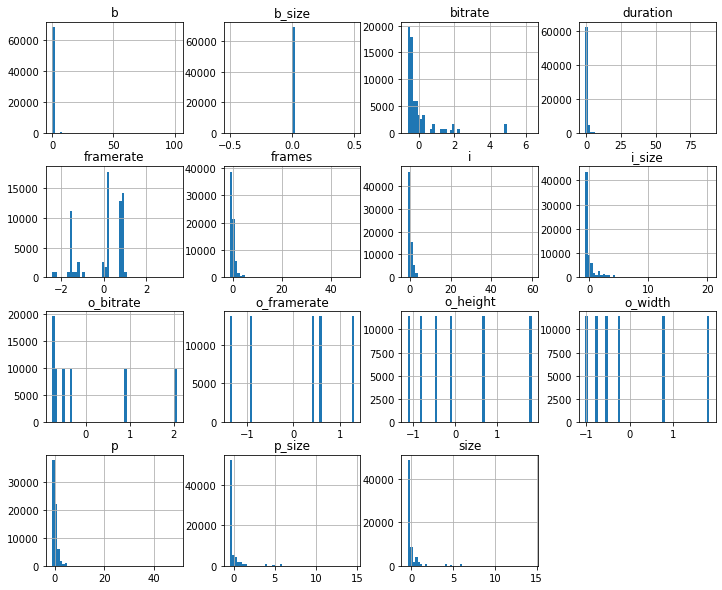

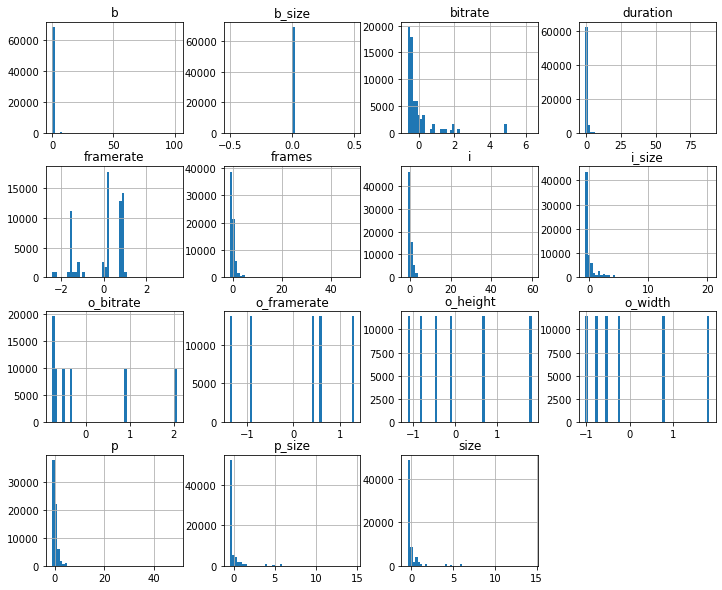

In [3]:
#################################################
#################################################
## This Notebook uses RYAN's encoding/Scaling  ##
#################################################
#################################################

########################### Video Dataset ##########################
video_data = pd.read_csv('../input/project4set2/transcoding_mesurment.tsv', sep='\t')
video_data_df = pd.DataFrame(data=video_data)

#### OHE ####
video_data_noid = video_data_df.copy()
video_data_noid.drop(['id'], axis=1, inplace=True)


df_codec = pd.concat([video_data_noid, pd.get_dummies(video_data_noid['codec'], prefix = 'codec')], axis=1)
df_codec.drop(['codec'], axis=1, inplace=True)


df_o_codec = pd.concat([df_codec, pd.get_dummies(df_codec['o_codec'], prefix = 'o_codec')], axis=1)
df_o_codec.drop(['o_codec'], axis=1, inplace=True)

video_data_proc_df = df_o_codec.copy()


#### Save a non Scaled Copy ###
encodedVideoDataset=video_data_proc_df.copy(deep=True)
unscaledEncodedVideoDataset = encodedVideoDataset.copy(deep=True)

#### Scaling ####
from sklearn.preprocessing import StandardScaler

video_col_names = video_data_proc_df.columns
video_features = video_data_proc_df[video_col_names]
video_scaler = StandardScaler().fit(video_features.values)
video_features = video_scaler.transform(video_features.values)

#assign scaled results to the dataset copy
video_data_proc_df[video_col_names] = video_features
#print(video_data_proc_df)

video_data_proc_df.hist(column=['duration', 'bitrate' , 'framerate' , 'i',  'p', 'b' , 'frames', 'i_size', 'p_size' , 'b_size', 'size', 'o_bitrate', 'o_framerate', 'o_height', 'o_width'
], figsize = (12,10), bins=50)

############# Incorporate back into Jake's Notebook ##########
encodedVideoDataset=video_data_proc_df.copy(deep=True)

video_data_proc_df.hist(column=['duration', 'bitrate' , 'framerate' , 'i',  'p', 'b' , 'frames', 'i_size', 'p_size' , 'b_size', 'size', 'o_bitrate', 'o_framerate', 'o_height', 'o_width'
], figsize = (12,10), bins=50)
videoFeatureList = list(encodedVideoDataset.columns)
videoFeatureList.remove('utime')
videoFeatureList.remove('umem')

###### Used by the rest of the Notebook ######
encodedVideoDataset

In [4]:
#####################################
## Feature Selection: Bike Dataset ##
#####################################
# Target value 'cnt'
bikeMutalInfo = mutual_info_regression(encodedBikeDataset[bikeFeatureList], encodedBikeDataset['cnt'])
bikeFTest, bikePValues = f_regression(encodedBikeDataset[bikeFeatureList], encodedBikeDataset['cnt']) 

# Zip 'features' and 'values'together....
bikeMutalInfoArray = []
bikeFScoreArray = []
bikePvalueArray = []

feature_counter = 0
for feature in bikeFeatureList:
    
    # Interpretable mutual_info_regression() Array.. 
    # dependency between given feature & 'cnt'
    bikeMutalInfoArray.append((feature, bikeMutalInfo[feature_counter]))

    # Interpretable f_score Array.. 
    # including this 'feature' affects performance this much....
    bikeFScoreArray.append((feature, bikeFTest[feature_counter]))
    
    # Interpretable p_value Array.. 
    # how this feature affects target variable (by chance?)....    
    bikePvalueArray.append((feature, bikePValues[feature_counter]))
    
    feature_counter += 1
    
# Sort each array descending order
bikeMutalInfoArray.sort(key = lambda x: x[1], reverse=True)
bikeFScoreArray.sort(key = lambda x: x[1], reverse=True)
bikePvalueArray.sort(key = lambda x: x[1], reverse=True)

# Transform to DataFrame for display and label columns
bikeMutalInfoDf = pd.DataFrame(bikeMutalInfoArray,columns=['Feature', 'Mutual Info'])
bikeFScoreDf = pd.DataFrame(bikeFScoreArray,columns=['Feature', 'F-score'])
bikePValuesDf = pd.DataFrame(bikePvalueArray,columns=['Feature', 'P-Value'])

# Display all thre ordered tables
display_html(bikeMutalInfoDf)
display_html(bikeFScoreDf)
display_html(bikePValuesDf)

,Feature,Mutual Info
0,instant,0.904502
1,atemp,0.464727
2,temp,0.388794
3,mnth,0.375859
4,yr,0.272994
5,season_1,0.195535
6,season_3,0.071191
7,windspeed,0.055491
8,hum,0.045800
9,weekday,0.045005


,Feature,F-score
0,atemp,482.454311
1,instant,476.810740
2,temp,473.471711
3,yr,344.890586
4,season_1,338.467598
5,season_3,99.459088
6,mnth,62.004625
7,weathersit_1,49.798737
8,weathersit_3,44.540374
9,windspeed,42.437842


,Feature,P-Value
0,dteday,5.135051e-01
1,workingday_0,9.849496e-02
2,workingday_1,9.849496e-02
3,season_4,7.634430e-02
4,weekday,6.839081e-02
5,holiday_0,6.475936e-02
6,holiday_1,6.475936e-02
7,hum,6.454143e-03
8,season_2,7.268728e-05
9,weathersit_2,2.581480e-06


In [5]:
######################################
## Feature Selection: Video Dataset ##
######################################
videoMutalInfo = mutual_info_regression(encodedVideoDataset[videoFeatureList][0:20000], encodedVideoDataset[0:20000]['utime'],n_neighbors=3)
videoFTest, videoPValues = f_regression(encodedVideoDataset[videoFeatureList], encodedVideoDataset['utime']) 

# Zip 'features' and 'values'together...
videoMutalInfoArray = []
videoFScoreArray = []
videoPvalueArray = []

feature_counter = 0
for feature in videoFeatureList:
    
    # Interpretable mutual_info_regression() Array.. 
    # dependency between given feature & 'utime'
    videoMutalInfoArray.append((feature, videoMutalInfo[feature_counter]))

    # Interpretable f_score Array.. 
    # including this 'feature' affects performance this much....
    videoFScoreArray.append((feature, videoFTest[feature_counter]))
    
    # Interpretable p_value Array.. 
    # how this feature affects target variable (by chance?)....    
    videoPvalueArray.append((feature, videoPValues[feature_counter]))
    
    feature_counter += 1
    
# Sort each array descending order
videoMutalInfoArray.sort(key = lambda x: x[1], reverse=True)
videoFScoreArray.sort(key = lambda x: x[1], reverse=True)
videoPvalueArray.sort(key = lambda x: x[1], reverse=True)

# Transform to DataFrame for display and label columns
videoMutalInfoDf = pd.DataFrame(videoMutalInfoArray,columns=['Feature', 'Mutual Info'])
videoFScoreDf = pd.DataFrame(videoFScoreArray,columns=['Feature', 'F-score'])
videoPValuesDf = pd.DataFrame(videoPvalueArray,columns=['Feature', 'P-Value'])

# Display all thre ordered tables
display_html(videoMutalInfoDf)
display_html(videoFScoreDf)
display_html(videoPValuesDf)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Feature,Mutual Info
0,o_width,0.362165
1,o_height,0.360900
2,p_size,0.296705
3,bitrate,0.295352
4,p,0.295146
5,duration,0.294517
6,frames,0.294352
7,size,0.291110
8,i,0.285626
9,i_size,0.284445


,Feature,F-score
0,b_size,NaN
1,o_width,25950.518895
2,o_height,25444.403222
3,o_codec_h264,12922.464116
4,o_codec_flv,5350.164834
5,o_codec_mpeg4,2056.537938
6,o_bitrate,1703.902785
7,bitrate,1697.644672
8,width,1179.829517
9,height,1154.421640


,Feature,P-Value
0,b_size,NaN
1,codec_flv,2.372373e-01
2,b,1.776859e-01
3,duration,1.467846e-01
4,codec_vp8,9.394174e-04
5,i,1.238180e-06
6,frames,3.718494e-18
7,p,3.047665e-18
8,o_codec_vp8,1.943550e-28
9,codec_h264,4.499795e-44


In [8]:
###############################################
# Neural Network: Vary size and weight,decay ##
###############################################
from sklearn.model_selection  import cross_validate

X = encodedBikeDataset[bikeFeatureList]
Y = encodedBikeDataset['cnt']

mlp = MLPRegressor(hidden_layer_sizes=(25,25,25), activation='tanh', alpha=1)


cv = cross_validate(mlp, X, Y, return_train_score=True, scoring='neg_mean_squared_error', cv=10, verbose=False)
bike_train_MSE = -1* cv['train_score']
bike_test_MSE = -1* cv['test_score']

bike_train_RMSE = np.sqrt(bike_train_MSE)
bike_test_RMSE = np.sqrt(bike_test_MSE)

print("Linear Regression")
print("Bike Training RMSE: " +str(bike_train_RMSE))
print("Bike Testing RMSE: " +str(bike_test_RMSE))


print("Average Bike Training RMSE: " +str(np.mean(bike_train_RMSE)))
print("Average Bike Testing/Validation RMSE: " +str(np.mean(bike_test_RMSE)))

print("---------------------------------")

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Linear Regression
Bike Training RMSE: [0.30000457 0.29725854 0.30446054 0.28219342 0.30469154 0.29402959
 0.27594738 0.29282599 0.2955646  0.28653128]
Bike Testing RMSE: [0.24820901 0.32412272 0.32759863 0.34288744 0.32638185 0.25909954
 0.47668773 0.41641027 0.40640716 0.63059635]
Average Bike Training RMSE: 0.29335074351180584
Average Bike Testing/Validation RMSE: 0.3758400696426854
---------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
########################################
## Video Dataset Hyperparameter Tuning #
########################################

X = encodedVideoDataset[videoFeatureList]
Y = encodedVideoDataset['utime']

mlp = MLPRegressor(hidden_layer_sizes=(25,25), activation='logistic', alpha=0.1)


cv = cross_validate(mlp, X, Y, return_train_score=True, scoring='neg_mean_squared_error', cv=10, verbose=False)
video_train_MSE = -1* cv['train_score']
video_test_MSE = -1* cv['test_score']

video_train_RMSE = np.sqrt(video_train_MSE)
video_test_RMSE = np.sqrt(video_test_MSE)

print("Multilayer Perceptron Regression")
print("Video Training RMSE: " +str(video_train_RMSE))
print("Video Testing RMSE: " +str(video_test_RMSE))


print("Average Video Training RMSE: " +str(np.mean(video_train_RMSE)))
print("Average Video Testing/Validation RMSE: " +str(np.mean(video_test_RMSE)))

print("---------------------------------")

In [ ]:
#comment